In [2]:
print("hello Ak")

hello Ak


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import warnings
warnings.filterwarnings("ignore")

import requests
import glob

import streamlit as st
from streamlit_option_menu import option_menu

In [4]:
df1 = pd.read_csv(r"C:\Users\HP\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")

df2 = pd.read_csv(r"C:\Users\HP\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")

df3 = pd.read_csv(r"C:\Users\HP\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

df4 = pd.read_csv(r"C:\Users\HP\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

df5 = pd.read_csv(r"C:\Users\HP\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df = pd.concat([df1, df2, df3, df4, df5], ignore_index = True)

df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
938172,2024-10,YISHUN,5 ROOM,631,YISHUN ST 61,01 TO 03,141.0,Model A,1992,800000.0,66 years 09 months
938173,2024-10,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,690000.0,62 years 04 months
938174,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,1000000.0,66 years 09 months
938175,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,04 TO 06,164.0,Apartment,1992,995000.0,66 years 09 months


In [5]:
df.shape

(938177, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938177 entries, 0 to 938176
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                938177 non-null  object 
 1   town                 938177 non-null  object 
 2   flat_type            938177 non-null  object 
 3   block                938177 non-null  object 
 4   street_name          938177 non-null  object 
 5   storey_range         938177 non-null  object 
 6   floor_area_sqm       938177 non-null  float64
 7   flat_model           938177 non-null  object 
 8   lease_commence_date  938177 non-null  int64  
 9   resale_price         938177 non-null  float64
 10  remaining_lease      229127 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.7+ MB


In [7]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,938177.0,95.686054,25.806537,28.0,73.0,93.0,113.0,366.7
lease_commence_date,938177.0,1988.392148,10.779328,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,938177.0,324285.504546,173754.089451,5000.0,195000.0,300000.0,420000.0,1588000.0


In [9]:
df["resale_price"].value_counts()

resale_price
300000.0    6941
350000.0    6897
280000.0    6559
320000.0    6548
380000.0    6364
            ... 
972800.0       1
653988.0       1
784888.0       1
772277.0       1
682088.0       1
Name: count, Length: 9689, dtype: int64

### DATA CLEANING

In [10]:
df.nunique()

month                   418
town                     27
flat_type                 8
block                  2719
street_name             588
storey_range             25
floor_area_sqm          214
flat_model               34
lease_commence_date      55
resale_price           9689
remaining_lease         729
dtype: int64

In [11]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

### REMAINING LEASE

In [12]:
def convert_to_years(row):
    
    if pd.notna(row) and isinstance(row, str):
        
        if "year" in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
        
    return row    

In [13]:
df["remaining_lease"] = df["remaining_lease"].apply(convert_to_years)

In [14]:
# FILL NULL VALUES IN  remaining_ease with mode because null value more than 25% it will remove affected affected in accuracy

df["remaining_lease"] = df["remaining_lease"].fillna(df["remaining_lease"].mode()[0])

df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
938172,2024-10,YISHUN,5 ROOM,631,YISHUN ST 61,01 TO 03,141.0,Model A,1992,800000.0,66.750000
938173,2024-10,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,690000.0,62.333333
938174,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,1000000.0,66.750000
938175,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,04 TO 06,164.0,Apartment,1992,995000.0,66.750000
938176,2024-10,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145.0,Maisonette,1988,888888.0,62.750000


In [15]:
df["remaining_lease"].value_counts()

remaining_lease
68.000000    711680
95.000000      2432
67.000000      2224
69.000000      1915
71.000000      1785
              ...  
97.750000         1
97.416667         1
97.583333         1
97.250000         1
96.833333         1
Name: count, Length: 676, dtype: int64

In [16]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

### WRONG FORMAT

In [17]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [18]:
# MONTH COLUMN

# SEPARATE THE YEAR AND MONTH OF RESALE BECAUSE THIS IS TIME SERIES DATA

df[["resale_year", "resale_month"]] = df["month"].str.split("-", expand = True)

# DROP THE RESALE MONTH COLUMN

df.drop("month", axis = 1, inplace = True)

df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.0,1990,01
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.0,1990,01
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.0,1990,01


In [19]:
# SPLIT THE "RANGE" COLUMN INTO LOWER AND UPPER BOUNDS

df[["storey_lower_bound", "storey_upper_bound"]] = df["storey_range"].str.split("TO", expand = True) 

# CONVERT THE LOWER AND UPPER BOUNDS TO NUMERIC VALUES

df["storey_lower_bound"] = pd.to_numeric(df["storey_lower_bound"])

df["storey_upper_bound"] = pd.to_numeric(df["storey_upper_bound"])

df.tail()


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
938172,YISHUN,5 ROOM,631,YISHUN ST 61,01 TO 03,141.0,Model A,1992,800000.0,66.750000,2024,10,1,3
938173,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,690000.0,62.333333,2024,10,4,6
938174,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,1000000.0,66.750000,2024,10,10,12
938175,YISHUN,EXECUTIVE,654,YISHUN AVE 4,04 TO 06,164.0,Apartment,1992,995000.0,66.750000,2024,10,4,6
938176,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145.0,Maisonette,1988,888888.0,62.750000,2024,10,1,3


In [20]:
df.drop("storey_range", axis = 1, inplace =  True)

### CONVERTING

In [21]:
df["block"] = pd.to_numeric(df["block"], errors = "coerce")

df["resale_year"] = pd.to_numeric(df["resale_year"], errors = "coerce")

df['resale_month'] = pd.to_numeric(df["resale_month"], errors = "coerce")

df["block"] = df["block"].fillna(df["block"].mode()[0])

In [22]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [23]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

### TEXT ERRORS

In [24]:
objects_data_cols = [var for var in df.columns if df[var].dtype == "object"]

objects_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [25]:
df["town"].value_counts()

town
TAMPINES           80715
YISHUN             70778
JURONG WEST        67437
BEDOK              67179
WOODLANDS          66322
ANG MO KIO         52521
HOUGANG            51316
BUKIT BATOK        45127
CHOA CHU KANG      38833
BUKIT MERAH        34766
PASIR RIS          33472
SENGKANG           33345
TOA PAYOH          31867
QUEENSTOWN         29061
GEYLANG            28468
CLEMENTI           28265
BUKIT PANJANG      28038
KALLANG/WHAMPOA    27608
JURONG EAST        25008
SERANGOON          23007
PUNGGOL            21481
BISHAN             21422
SEMBAWANG          14219
MARINE PARADE       8097
CENTRAL AREA        7217
BUKIT TIMAH         2544
LIM CHU KANG          64
Name: count, dtype: int64

In [26]:
df['flat_type'].value_counts()

flat_type
4 ROOM              357089
3 ROOM              298667
5 ROOM              198031
EXECUTIVE            70379
2 ROOM               12160
1 ROOM                1307
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [27]:
# REPLACE "MULTI-GENERATION" WITH "MULTI GENERATION" IN THE SPECIFIED COLUMN TO AVOID DUPLICATE

df["flat_type"] = df["flat_type"].str.replace("MULTI-GENERATION", "MULTI GENERATION")

In [28]:
df["flat_type"].value_counts()

flat_type
4 ROOM              357089
3 ROOM              298667
5 ROOM              198031
EXECUTIVE            70379
2 ROOM               12160
1 ROOM                1307
MULTI GENERATION       544
Name: count, dtype: int64

In [29]:
df["street_name"].value_counts()

street_name
YISHUN RING RD        17742
BEDOK RESERVOIR RD    14833
ANG MO KIO AVE 10     13908
ANG MO KIO AVE 3      12239
HOUGANG AVE 8          9419
                      ...  
SENGKANG WEST RD          5
MARINE PARADE CTRL        3
TAMPINES NTH DR 1         3
CANBERRA VIEW             2
ALJUNIED AVE 2            1
Name: count, Length: 588, dtype: int64

In [30]:
df["flat_model"].value_counts()

flat_model
Model A                   199054
Improved                  170850
New Generation            111360
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47970
Simplified                 34700
Apartment                  25942
Standard                   25423
SIMPLIFIED                 23258
Maisonette                 17733
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10272
APARTMENT                   9901
DBSS                        3426
Adjoined flat               1270
Model A-Maisonette          1111
MODEL A-MAISONETTE           982
Terrace                      450
Type S1                      447
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      223
2-room                       156
Premium Apartment Loft       114
Premium Maisonette            86
Improved-Maisonette           84

In [31]:
df["flat_model"] = df['flat_model'].replace({"MODEL A": "Model A", "NEW GENERATION": "New Generation",
                                             "IMPROVED": "Improved", "PREMIUM APARTMENT": "Premium Apartment",
                                             "MULTI GENERATION": "Multi Generation", "2-ROOM": "2-room",
                                             "SIMPLIFIED": "Simplified", "STANDARD": "Standard", "MAISONETTE": "Maisonette",
                                             "MULTI GENERATION": "Multi Generation", "APARTMENT": "Apartment", "MODEL A-MAISONETTE": "Model A-Maisonette",
                                             "TERRACE": "Terrace", "IMPROVED-MAISONETTE": "Improved-Maisonette"})

In [32]:
df["flat_model"].value_counts()

flat_model
Model A                   269435
Improved                  244439
New Generation            190258
Simplified                 57958
Premium Apartment          47976
Standard                   42798
Apartment                  35843
Maisonette                 29948
Model A2                   10272
DBSS                        3426
Model A-Maisonette          2093
Adjoined flat               1270
Terrace                      697
Multi Generation             544
Type S1                      447
Type S2                      223
2-room                       177
Improved-Maisonette          128
Premium Apartment Loft       114
Premium Maisonette            86
3Gen                          45
Name: count, dtype: int64

### DUPLICATES

In [33]:
df.duplicated().sum()

np.int64(2361)

In [34]:
df.drop_duplicates(inplace = True)

df.duplicated().sum()

np.int64(0)

### OUTLIERS

In [35]:
float_data_cols = [var for var in df.columns if df[var].dtype == "float64"]

float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [36]:
integers_data_cols = [var for var in df.columns if df[var].dtype == "int64"]

integers_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

### USING BOXPLOT

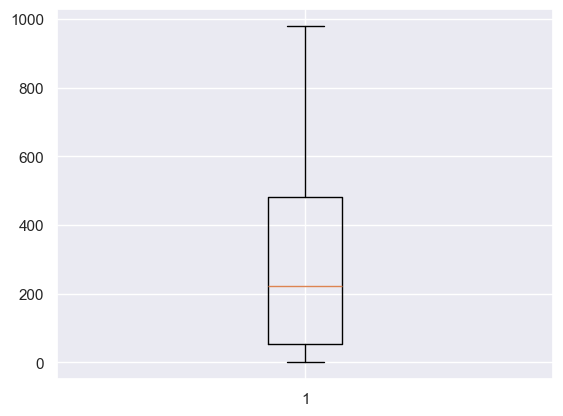

In [37]:
# CREATING PLOT

plt.boxplot(df["block"])

# SHOW PLOT

plt.show()

In [38]:
Q1 = df["block"].quantile(0.25)

Q3 = df["block"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-589.5), np.float64(1126.5))

In [39]:
df.block = df.block.clip(lower_bound, upper_bound)

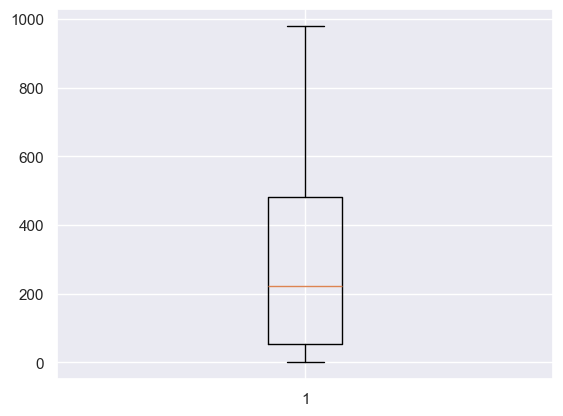

In [40]:
# CREATING PLOT

plt.boxplot(df["block"])

# SHOW PLOT

plt.show()

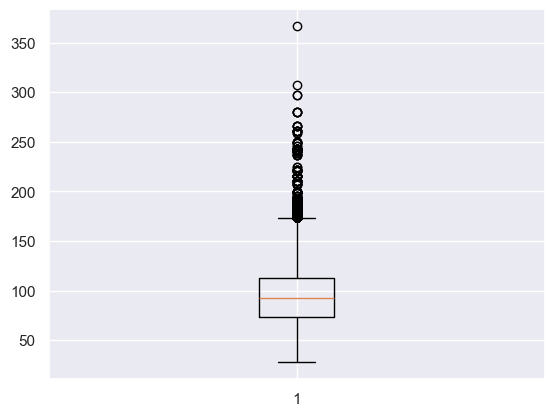

In [41]:
# CREATING PLOT

plt.boxplot(df["floor_area_sqm"])

# SHOW PLOT

plt.show()

In [42]:
Q1 = df["floor_area_sqm"].quantile(0.25)

Q3 = df["floor_area_sqm"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(13.0), np.float64(173.0))

In [43]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound, upper_bound)

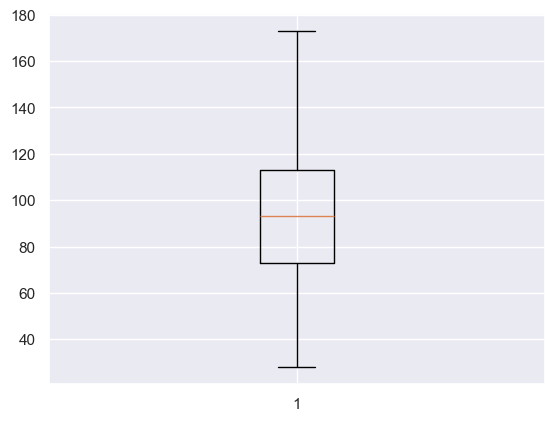

In [44]:
# CREATING PLOT

plt.boxplot(df["floor_area_sqm"])

# SHOW PLOT

plt.show()

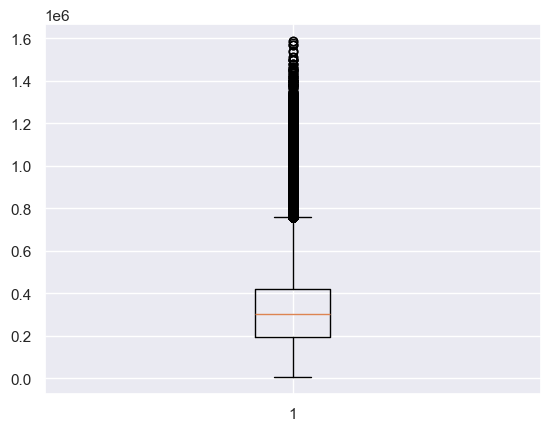

In [45]:
# CREATE PLOT

plt.boxplot(df["resale_price"])

# SHOW PLOT

plt.show()

In [46]:
Q1 = df["resale_price"].quantile(0.25)

Q3 = df["resale_price"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-142500.0), np.float64(757500.0))

In [47]:
df.resale_price = df.resale_price.clip(lower_bound, upper_bound)

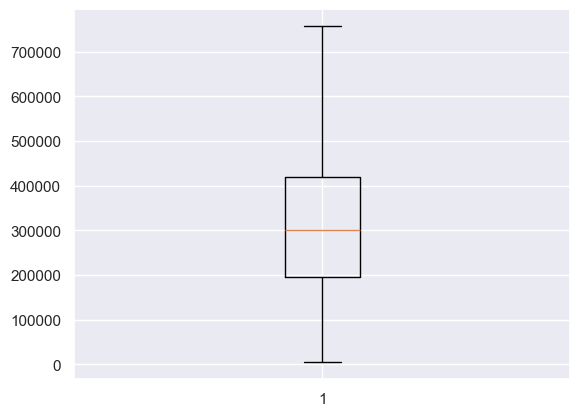

In [48]:
# CREATE PLOT

plt.boxplot(df["resale_price"])

# SHOW PLOT

plt.show()

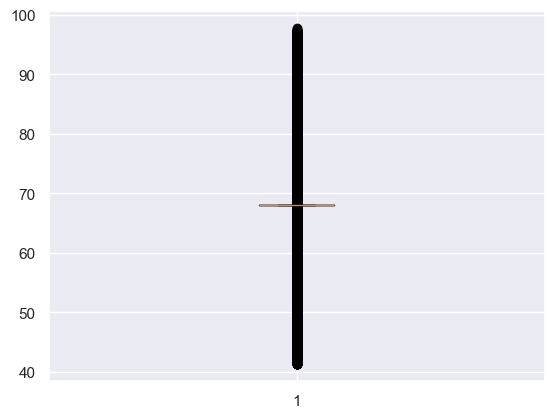

In [49]:
# CREATE PLOT

plt.boxplot(df["remaining_lease"])

# SHOW PLOT

plt.show()

In [50]:
Q1 = df["remaining_lease"].quantile(0.25)

Q3 = df["remaining_lease"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(68.0), np.float64(68.0))

In [51]:
df.remaining_lease = df.remaining_lease.clip(lower_bound, upper_bound)

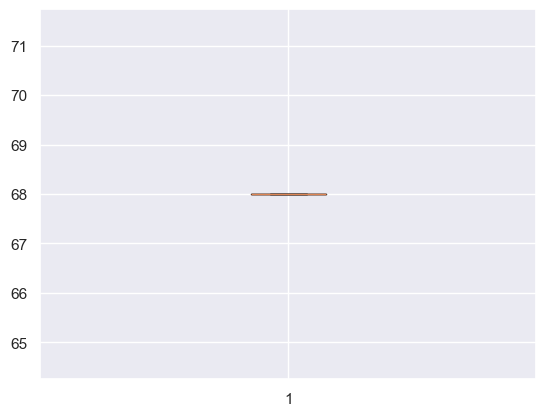

In [52]:
# CREATE PLOT

plt.boxplot(df["remaining_lease"])

# SHOW PLOT

plt.show()

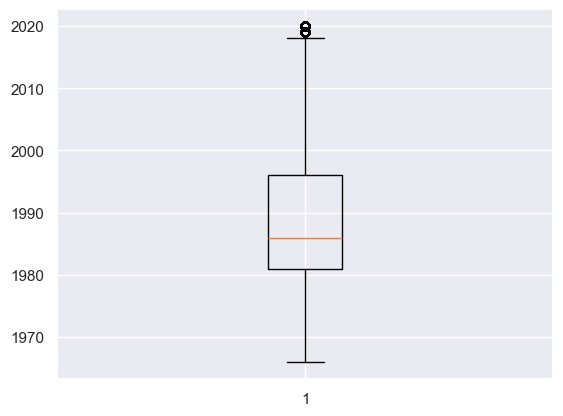

In [53]:
# CREATE PLOT

plt.boxplot(df["lease_commence_date"])

# SHOW PLOT

plt.show()

In [54]:
Q1 = df["lease_commence_date"].quantile(0.25)

Q3 = df["lease_commence_date"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(1958.5), np.float64(2018.5))

In [55]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound, upper_bound)

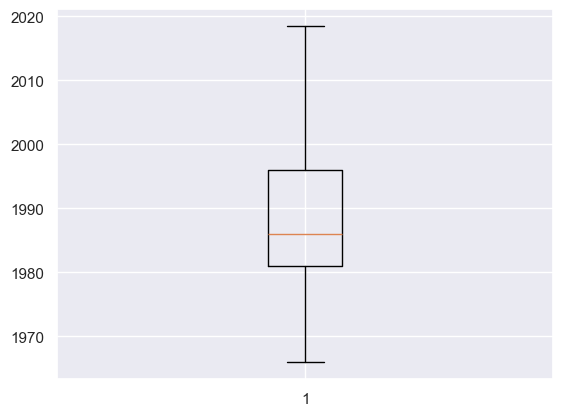

In [56]:
# CREATE PLOT

plt.boxplot(df["lease_commence_date"])

# SHOW PLOT

plt.show()

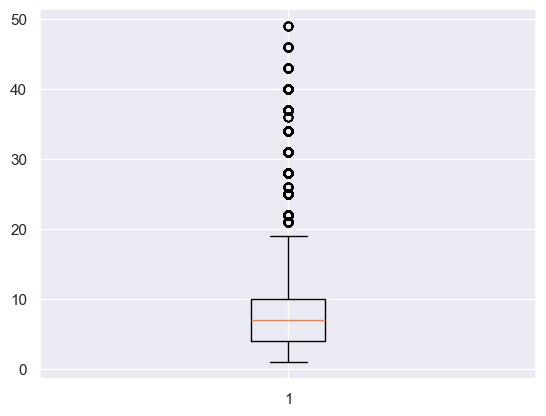

In [57]:
# CREATE PLOT

plt.boxplot(df["storey_lower_bound"])

# SHOW PLOT

plt.show()

In [58]:
Q1 = df["storey_lower_bound"].quantile(0.25)

Q3 = df["storey_lower_bound"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-5.0), np.float64(19.0))

In [59]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound, upper_bound)

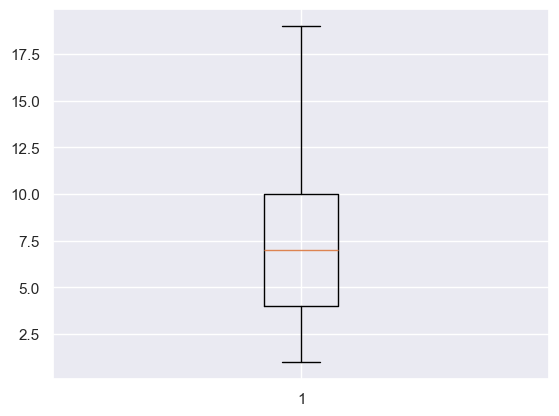

In [60]:
# CREATE PLOT

plt.boxplot(df["storey_lower_bound"])

# SHOW PLOT

plt.show()

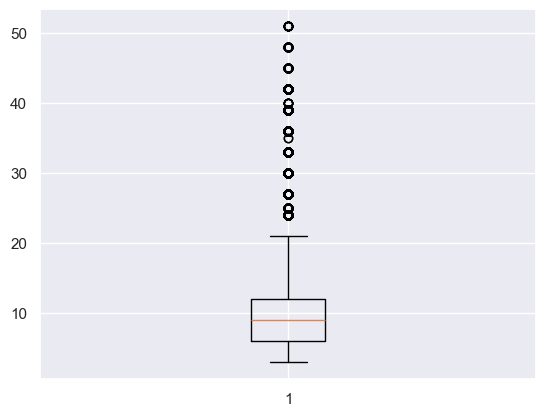

In [61]:
# CREATE PLOT

plt.boxplot(df["storey_upper_bound"])

# SHOW PLOT

plt.show()

In [62]:
Q1 = df["storey_upper_bound"].quantile(0.25)

Q3 = df["storey_upper_bound"].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-3.0), np.float64(21.0))

In [63]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound, upper_bound)

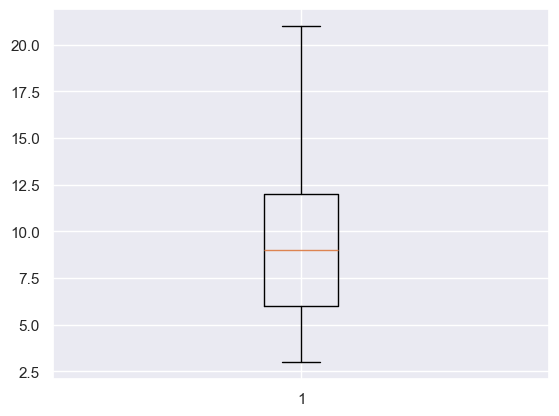

In [64]:
# CREATE PLOT

plt.boxplot(df["storey_upper_bound"])

# SHOW PLOT

plt.show()

### CATEGORICAL VS FREQUENCY USING BARPLOT

In [65]:
objects_data_cols = [var for var in df.columns if df[var].dtype == "object"]

objects_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

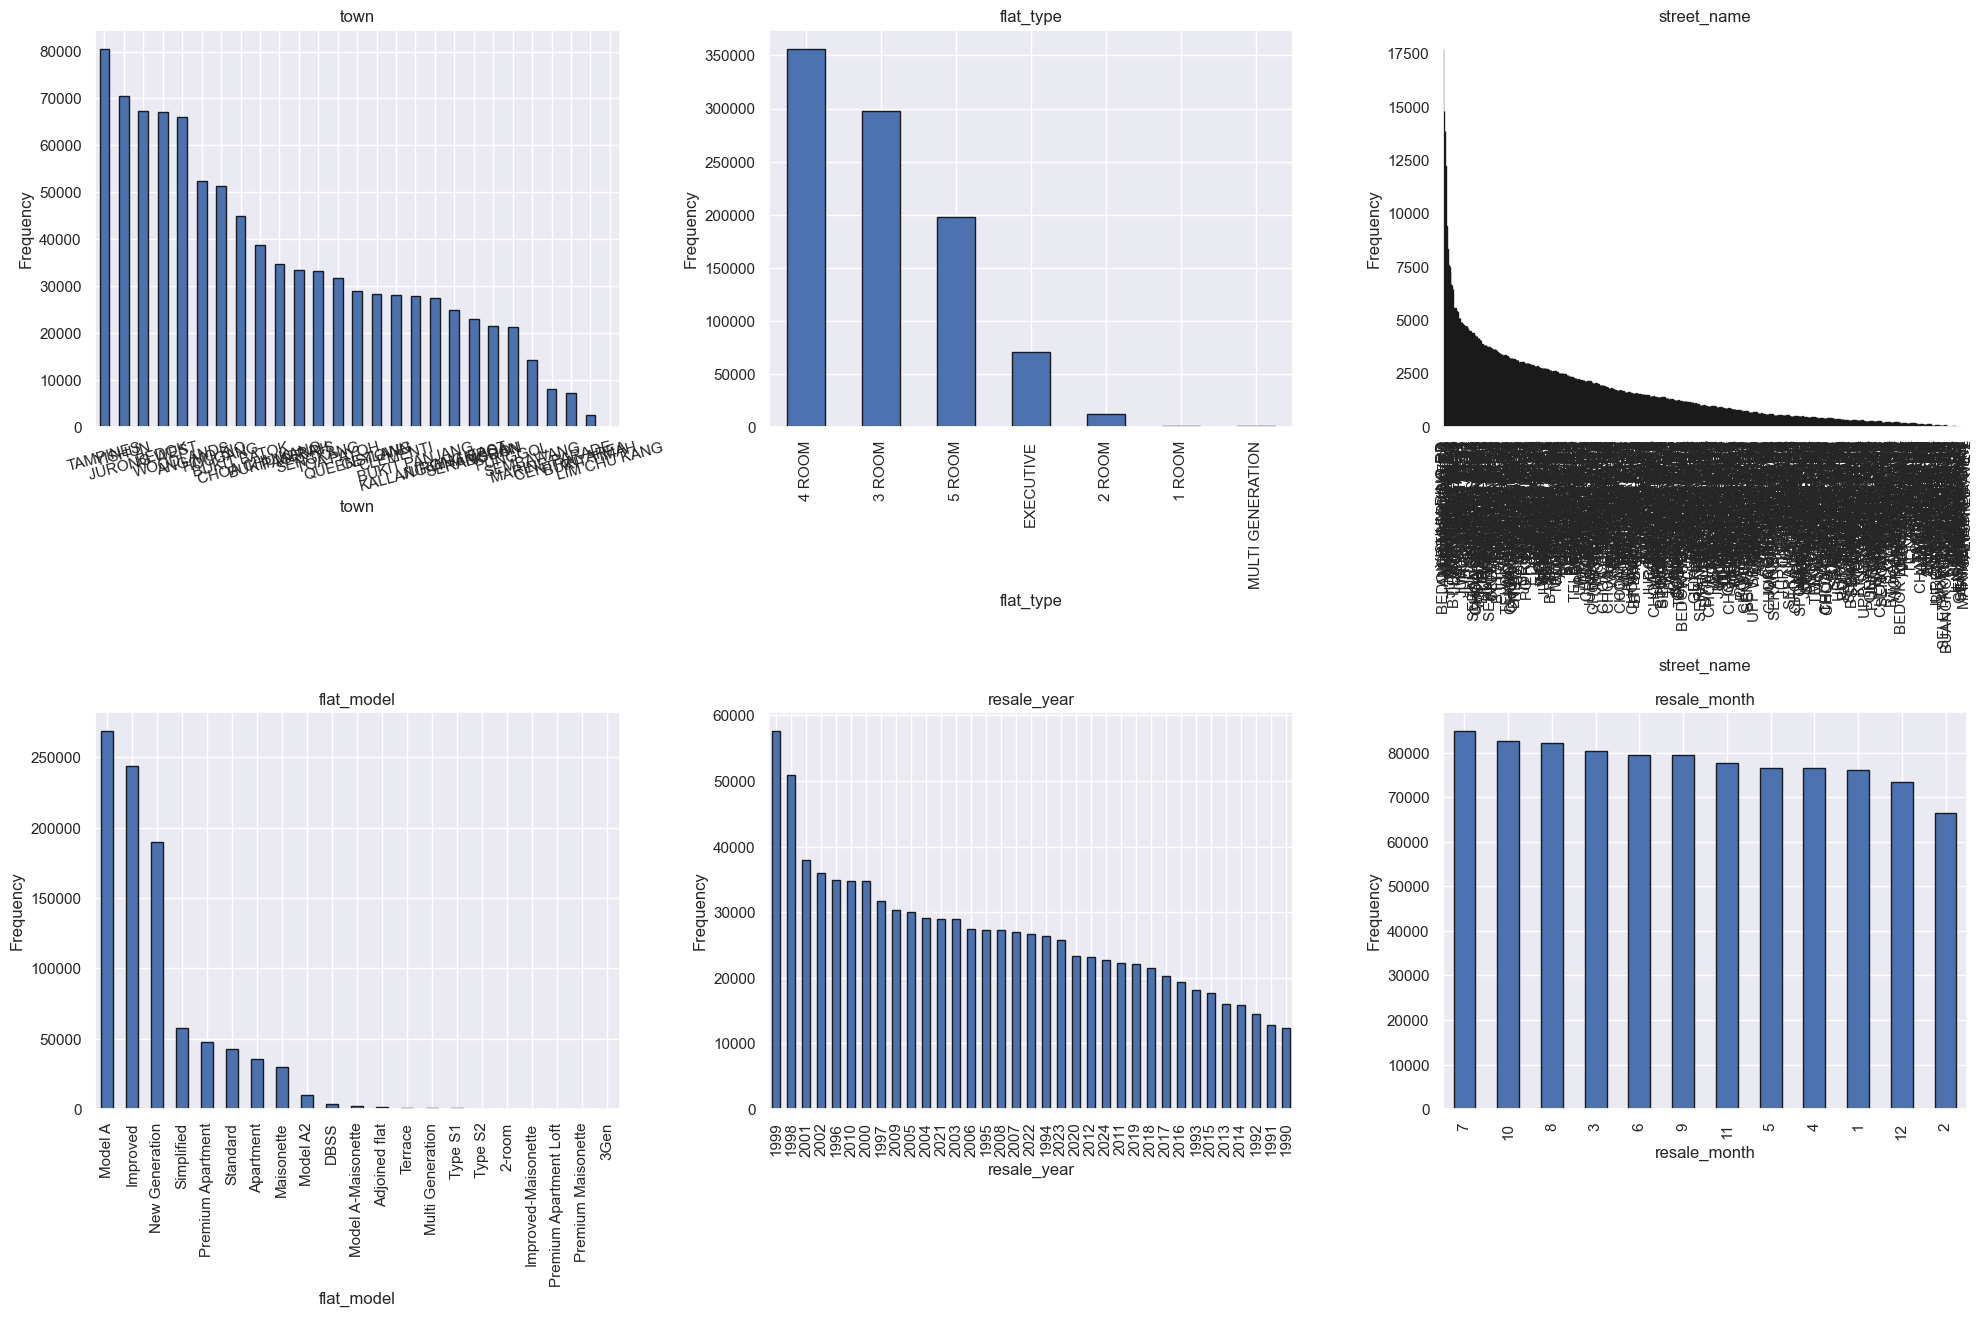

In [66]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### FEATURE VS TARGET (CATEGORICAL DATA)

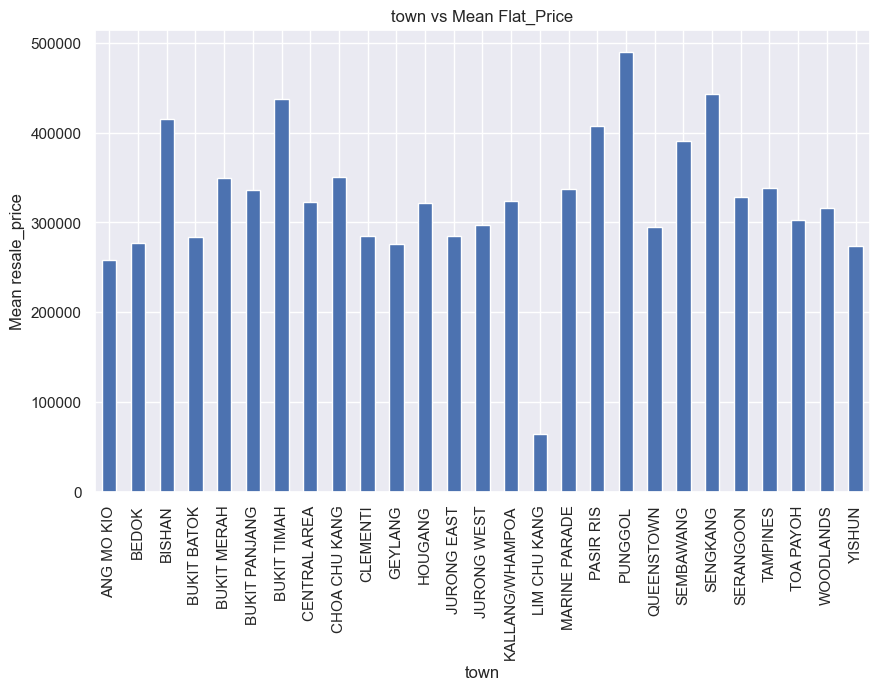

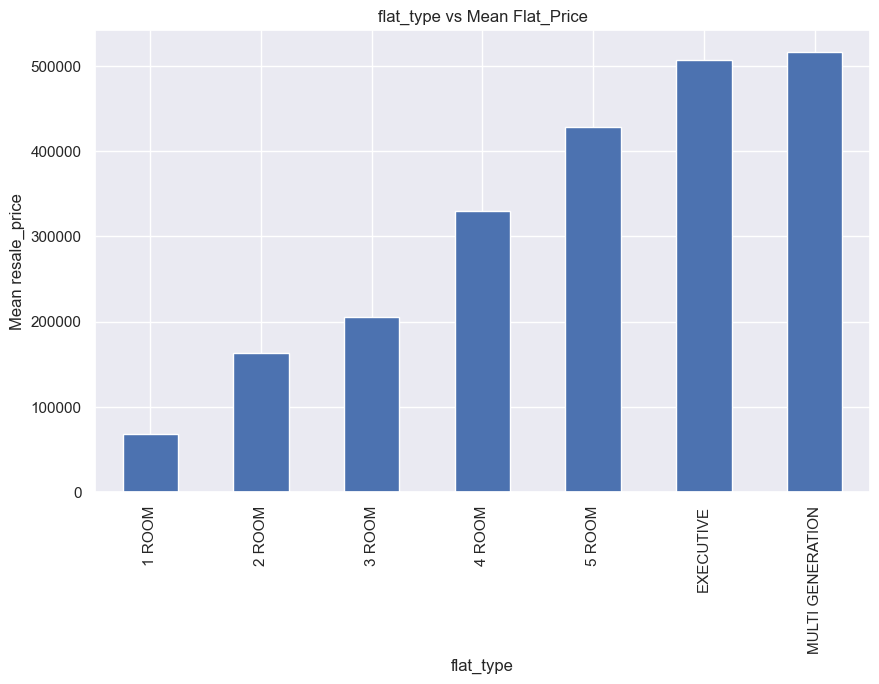

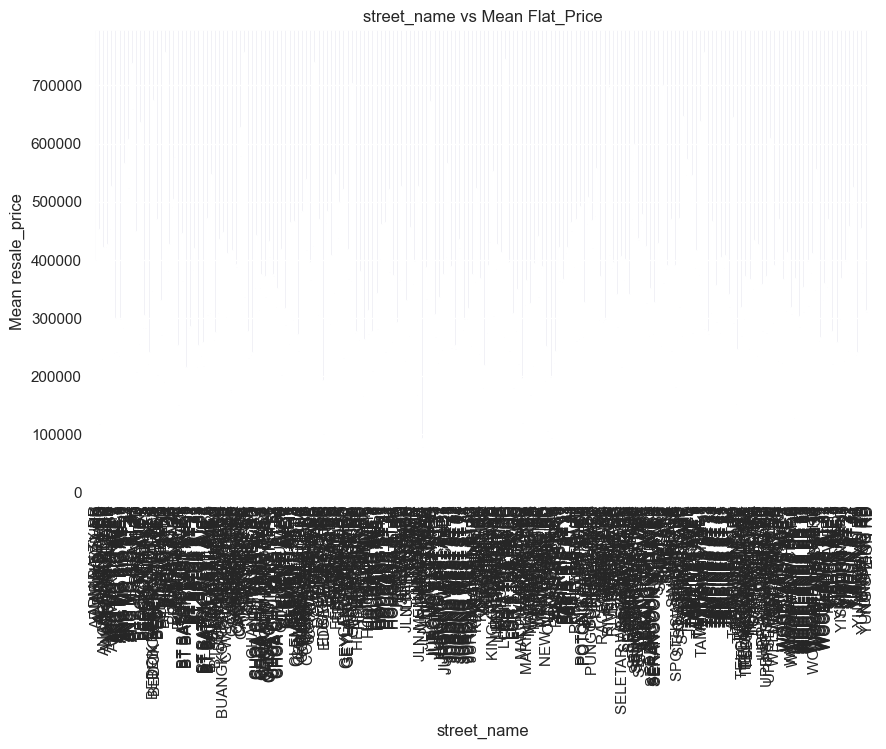

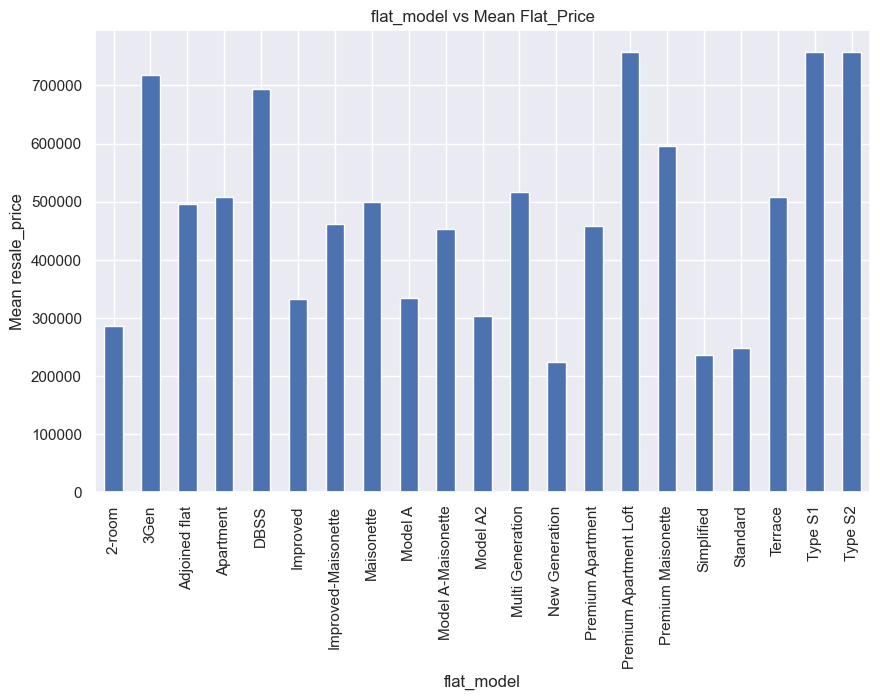

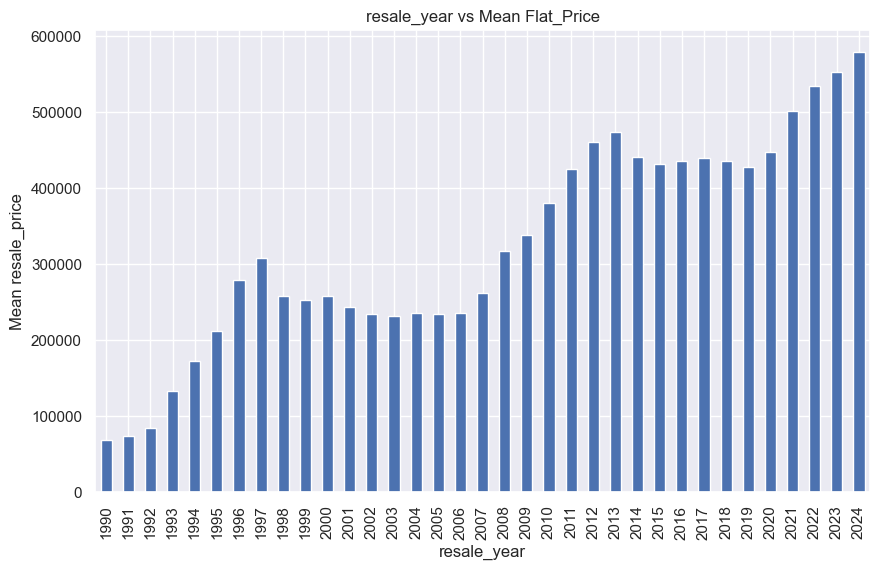

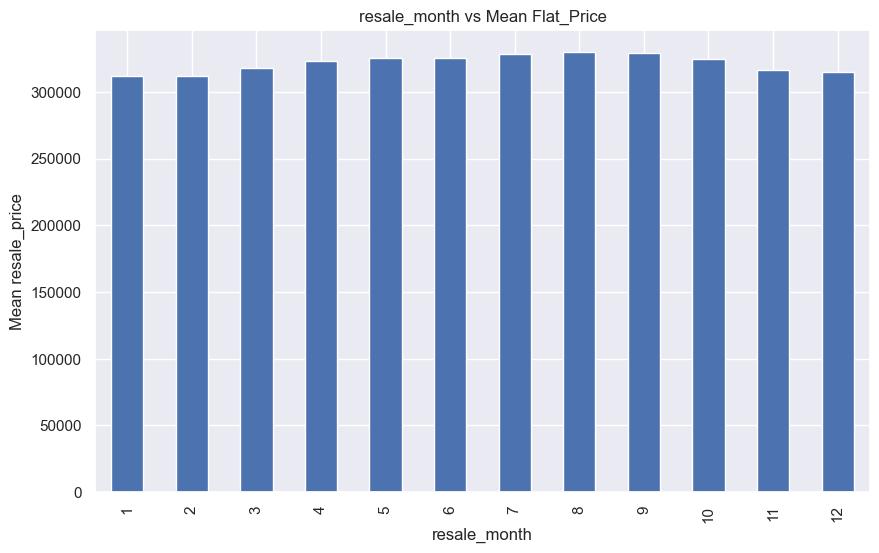

In [67]:
# LIST OF FEATURES TO PLOT

features = ["town",
            "flat_type",
            "street_name",
            "flat_model",
            "resale_year",
            "resale_month"]

for feature in features:
    plt.figure(figsize = (10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind = 'bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flat_Price')
    
    plt.show()

### FEATURE VS TARGET (CONTINOUS DATA)

In [68]:
float_data_cols = [var for var in df.columns if df[var].dtype == "float64"]

float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [69]:
integers_data_cols = [var for var in df.columns if df[var].dtype == "int64"]

integers_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

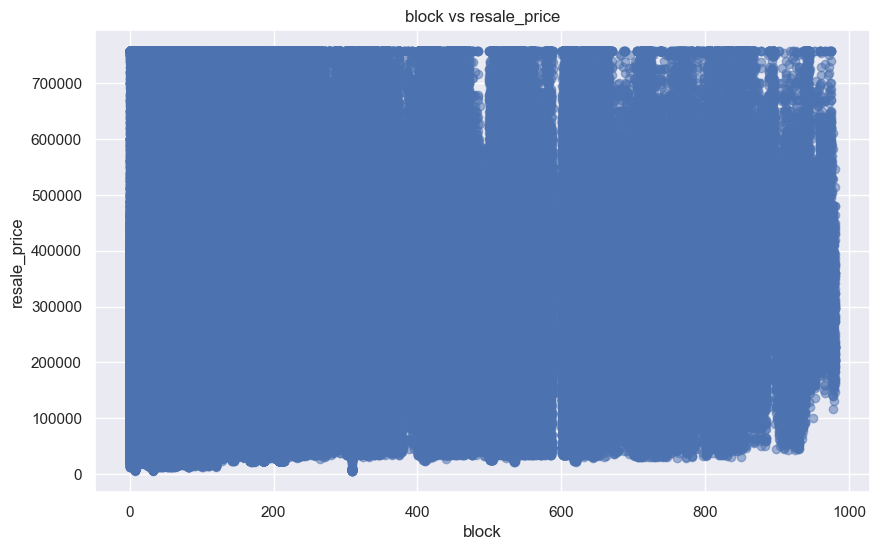

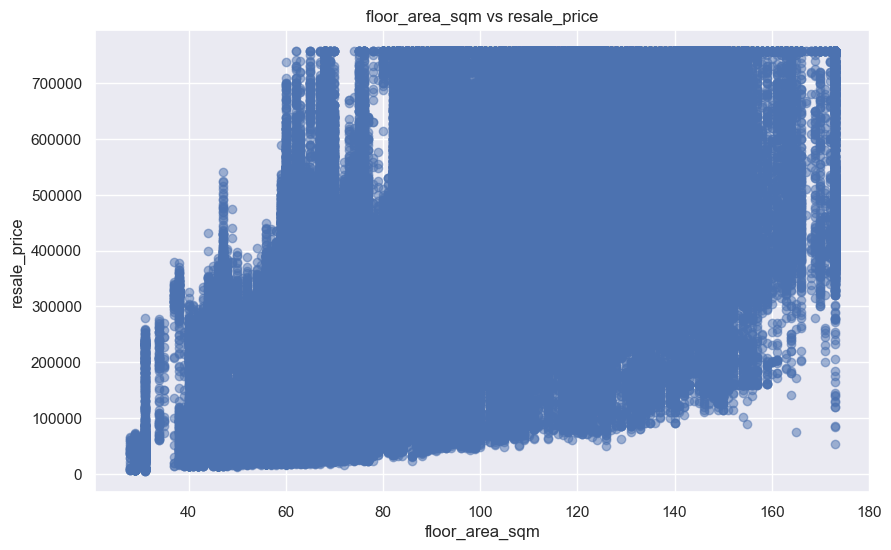

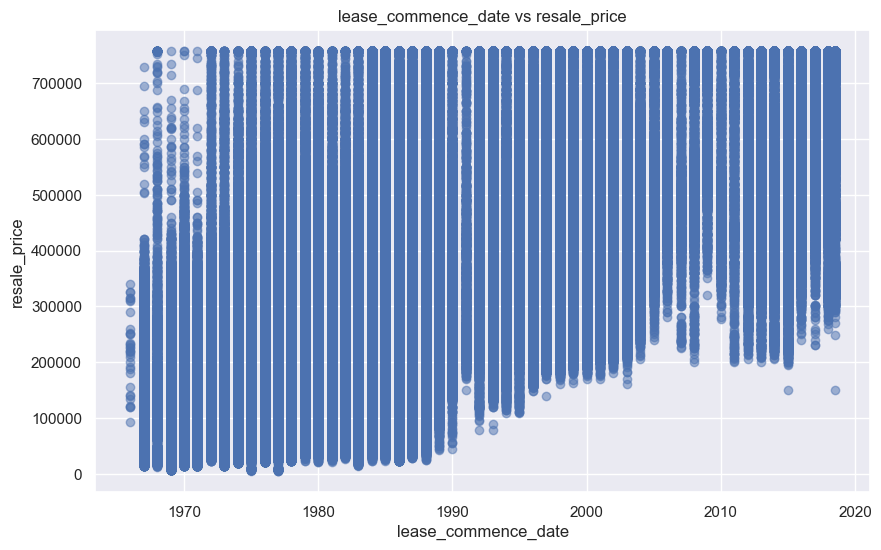

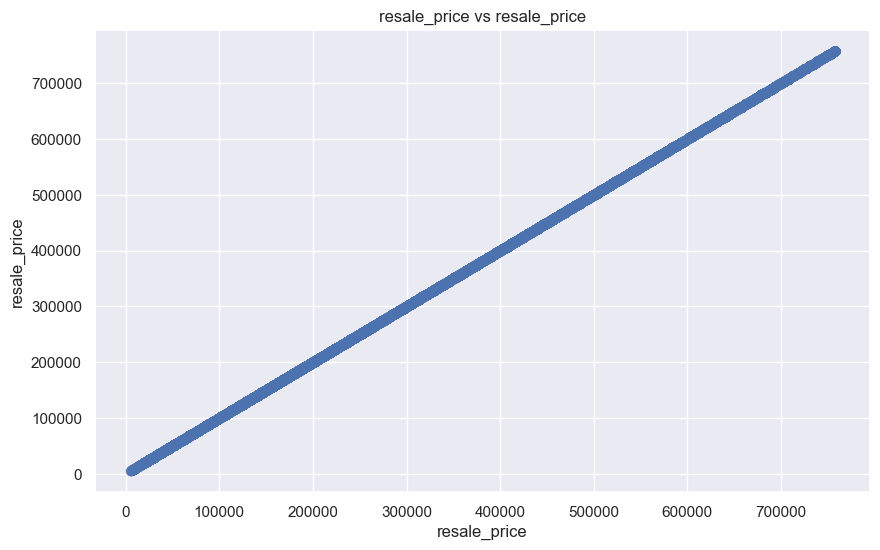

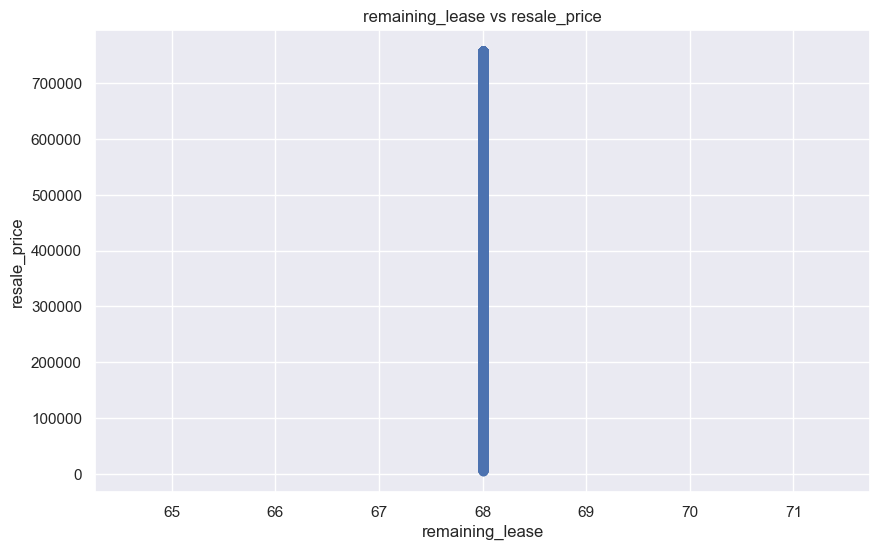

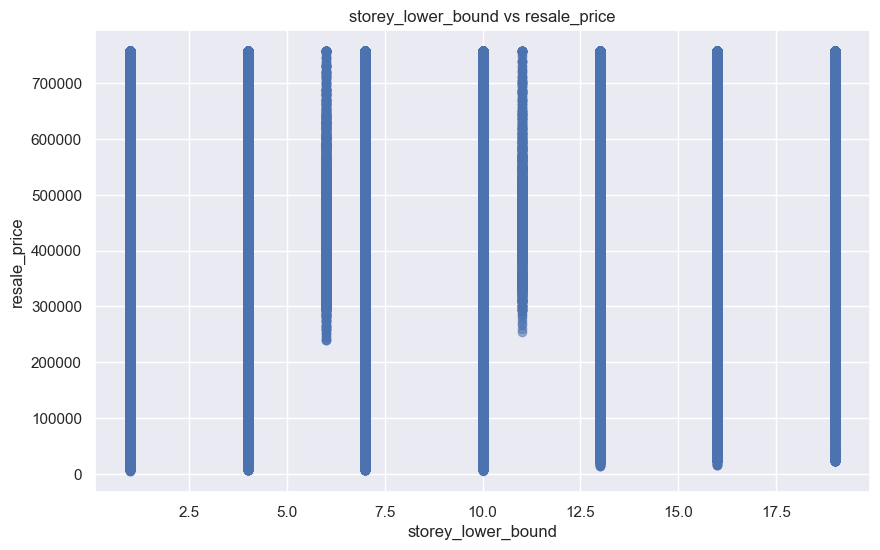

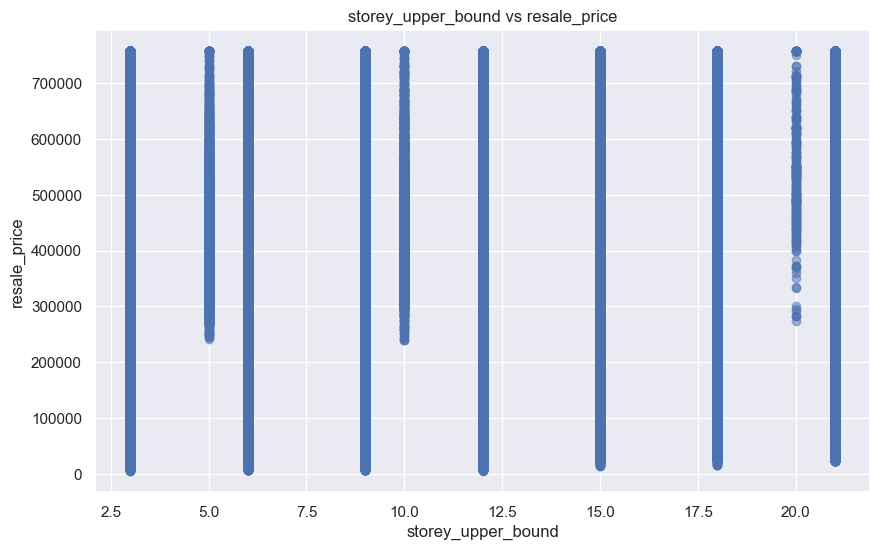

In [70]:
features = ["block",
            "floor_area_sqm",
            "lease_commence_date",
            "resale_price",
            "remaining_lease",
            "storey_lower_bound",
            "storey_upper_bound"]
target = "resale_price"

for feature in features:
    
    plt.figure(figsize = (10, 6))
    
    plt.scatter(df[feature], df[target], alpha = 0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    
    plt.show()

In [71]:
# USING ENCODING MAKE A COPY

df1 = df.copy()

In [72]:
object_data_cols = [var for var in df.columns if df[var]. dtype == "object"]

object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [73]:
from sklearn.preprocessing import LabelEncoder

# INITILIZE THE ENCODER

le = LabelEncoder()

In [74]:
# LIST UNIQUE STREET NAMES

streets = df1["street_name"].unique()

# MAP THE STREETS TO PROVIDE INPUT TO ML MODEL

streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}

streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [75]:
# ALTER THE COLUMN WITH THE MAPPED NUMBERS

df1["street_name"] = df1["street_name"].map(streets_mapping)

In [76]:
df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,1,73.0,New Generation,1976.0,47200.0,68.0,1990,1,4,6


In [77]:
df1["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [78]:
category_mapping = {"1 ROOM": 1,
                    "2 ROOM": 2,
                    "3 ROOM": 3,
                    "4 ROOM": 4,
                    "5 ROOM": 5,
                    "EXECUTIVE": 6,
                    "MULTI GENERATION": 7}

# ALTER THE COLUMN WITH THE MAPPED NUMBERS

df1["flat_type"] = df1["flat_type"].map(category_mapping)

# DISPLAY THE DATAFRAME

df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3,216.0,1,73.0,New Generation,1976.0,47200.0,68.0,1990,1,4,6


In [79]:
# CREATE A MAPPING OF "flat_model" values to numbers

flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# MAP 'flat_model' VALUES TO NUMBERS

df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# DISPLAY THE DATAFRAME

df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3,216.0,1,73.0,15,1976.0,47200.0,68.0,1990,1,4,6


In [80]:
# CREATE A MAPPING OF "TOWN" VALUES TO NUMBERS

town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# MAP 'town' VALUES TO NUMBERS

df1['town'] = df1['town'].map(town_mapping)

# DISPLAY THE DATAFRAME

df1.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9
4,1,3,216.0,1,73.0,15,1976.0,47200.0,68.0,1990,1,4,6


In [81]:
# SAVE THE PROCESSED DATA FOR THE DEPLOYMENT

df1.to_csv("final_csv")

### CORRELATION

In [82]:
# correlation matrix (ranges from 1 to -1)

corrm = df1.corr()

# corrm.to_csv("corrm.csv")

corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.207646,0.048873,0.586415,0.200289,0.164192,0.331841,0.123742,NaN,0.123951,0.004583,-0.018781,-0.018527
flat_type,0.207646,1.000000,0.127780,0.384582,0.954855,0.241248,0.402263,0.593168,NaN,0.099427,0.003560,0.076832,0.077158
block,0.048873,0.127780,1.000000,0.042300,0.188111,-0.004771,-0.005331,-0.087745,NaN,-0.120400,0.000775,-0.126029,-0.126055
street_name,0.586415,0.384582,0.042300,1.000000,0.353109,0.354412,0.735615,0.379880,NaN,0.317899,0.008066,0.082975,0.083588
floor_area_sqm,0.200289,0.954855,0.188111,0.353109,1.000000,0.199224,0.379494,0.567021,NaN,0.060835,0.002733,0.042992,0.043179
flat_model,0.164192,0.241248,-0.004771,0.354412,0.199224,1.000000,0.354239,0.245410,NaN,0.162342,0.002478,0.020881,0.021226
lease_commence_date,0.331841,0.402263,-0.005331,0.735615,0.379494,0.354239,1.000000,0.547129,NaN,0.434740,0.007157,0.156989,0.157352
resale_price,0.123742,0.593168,-0.087745,0.379880,0.567021,0.245410,0.547129,1.000000,NaN,0.691147,0.011961,0.211029,0.213563
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.123951,0.099427,-0.120400,0.317899,0.060835,0.162342,0.434740,0.691147,NaN,1.000000,-0.017462,0.097948,0.099873


### HEAT MAP

<Axes: >

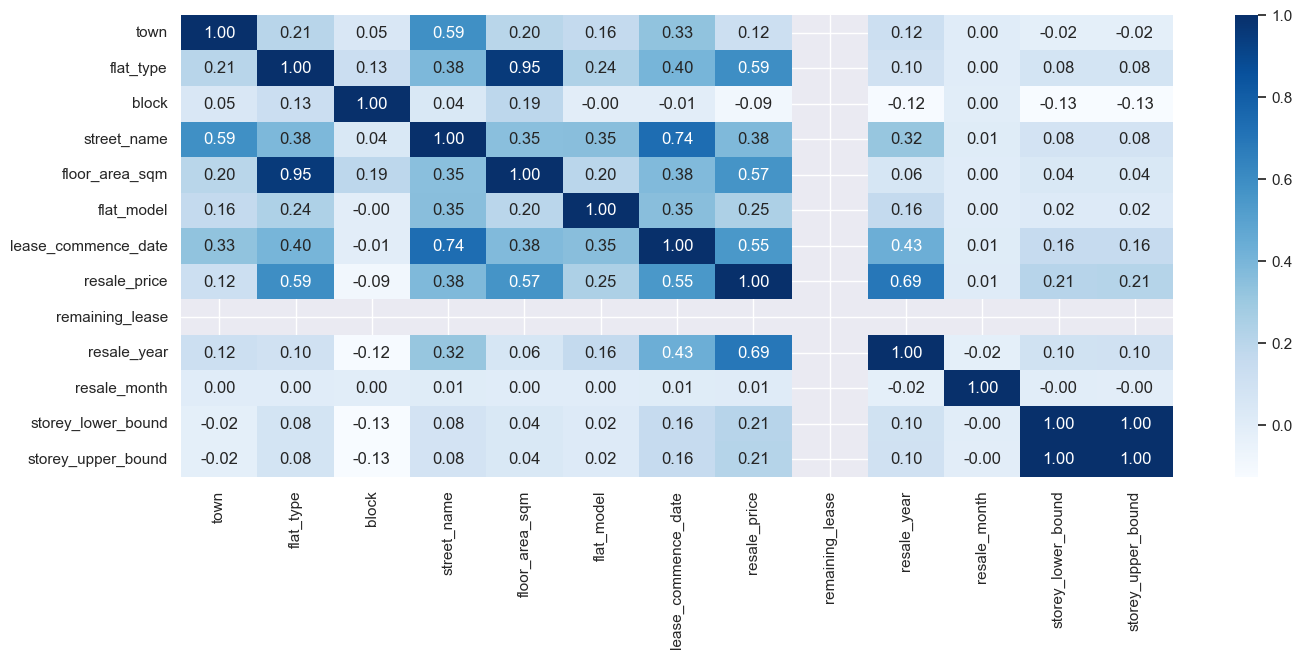

In [83]:
# VISUALIZE CORRELATION MATRIX IN SEABORN USING A HEATMAP

plt.figure(figsize = (16, 6))

sns.heatmap(corrm, annot = True, cmap = "Blues", fmt = ".2f")

In [84]:
df1.isnull().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
resale_year            0
resale_month           0
storey_lower_bound     0
storey_upper_bound     0
dtype: int64

### RIGHT TO MACHINE LEARNING

#### SPLIT

In [85]:
# ASSIGN FEATURE AND TARGET VARIABLE

x = df1.drop("resale_price", axis = 1)

y = df1["resale_price"]

# SPLITTING THE DATA INTO TRAINING AND TESTING SETS WITH THE RATIO OF 8:2

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=72)

In [86]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(748652, 12) (187164, 12) (748652,) (187164,)


### SCALLING

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[-1.11170222, -1.07074511, -1.05406872, ...,  1.00932802,
         -0.5804351 , -0.58379207],
        [-1.62448696, -1.07074511,  0.15239961, ..., -0.16702375,
         -0.5804351 , -0.58379207],
        [-1.49629077,  2.09327669,  1.33222668, ...,  1.00932802,
         -0.5804351 , -0.58379207],
        ...,
        [ 1.45222147,  1.03860276, -0.18632494, ..., -0.16702375,
          1.43777161,  1.43483243],
        [ 0.29845581, -0.01607118, -0.75720901, ...,  0.42115213,
          1.43777161,  1.43483243],
        [-1.2398984 , -0.01607118,  0.44925932, ...,  0.71524008,
         -0.5804351 , -0.58379207]]),
 array([[-1.49629077, -1.07074511, -0.95892138, ...,  1.30341596,
          1.43777161,  1.43483243],
        [ 0.04206344, -2.12541905, -1.08451587, ...,  0.71524008,
          0.09230047,  0.08908276],
        [ 1.06763292, -1.07074511,  1.70520427, ..., -0.75519963,
         -0.5804351 , -0.58379207],
        ...,
        [ 1.06763292, -0.01607118,  1.84982824, ...,  

### MODEL FIT

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from  sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### LINEAR REGRESSION

In [89]:
linear_model = LinearRegression(fit_intercept = True)

linear_model.fit(x_train, y_train)

print(linear_model.predict(x_test))

print(y_test)

[240096.60603929 212251.13723619 104629.17663838 ... 355772.69422078
 485464.26283864 635441.20020943]
419624    190000.0
688744    282000.0
296725    151000.0
65518      85000.0
929108    630168.0
            ...   
26476      56000.0
266003    255000.0
650276    422000.0
899534    540000.0
839372    757500.0
Name: resale_price, Length: 187164, dtype: float64


In [90]:
linear_model.score(x_test, y_test)

0.7968264724055691

In [91]:
from sklearn.model_selection import cross_val_score

cross_val_linear_model = cross_val_score(linear_model, x_train, y_train, cv = 10).mean()

cross_val_linear_model

np.float64(0.7952761836780569)

### K NEAREST NEIGHBOR REGRESSION

In [92]:
# Create and train the K Nearest Neighbor Regression model

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(x_train_scaled, y_train)

# Make predictions on the test set using KNN model

y_pred_knn = knn_regressor.predict(x_test_scaled)

# Calculate Mean Absolute Error (MAE)

mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)

mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)

rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score

r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)

print("Mean Squared Error (MSE)     :", mse_knn)

print("Root Mean Square Error (RMSE):", rmse_knn)

print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 29147.438862163675
Mean Squared Error (MSE)     : 1806726718.561519
Root Mean Square Error (RMSE): 42505.60808365784
R-squared (R2) Score         : 0.9343702854422411


### DECISION TREE REGRESSION

In [93]:
# Create and train the Decision Tree Regressor model

dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)

dt_regressor.fit(x_train, y_train)

# Make predictions on the test set using Decision Tree model

y_pred_dt = dt_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)

mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)

mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)

rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score

r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)

print("Mean Squared Error (MSE)     :", mse_dt)

print("Root Mean Square Error (RMSE):", rmse_dt)

print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17594.67023165958
Mean Squared Error (MSE)     : 693655234.0885953
Root Mean Square Error (RMSE): 26337.335364242816
R-squared (R2) Score         : 0.9748028329093535


### XGBOOST REGRESSION

In [94]:
# Create and train an XGBoost regressor

xgregressor = XGBRegressor()

xgregressor.fit(x_train, y_train)

# Make predictions

y_pred = xgregressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)

rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score

xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)

print("Mean Squared Error (MSE)     :", mse)

print("Root Mean Square Error (RMSE):", rmse)

print("R-squared (R2) Score         :", xgb_r2)

Mean Absolute Error (MAE)    : 17084.131248221507
Mean Squared Error (MSE)     : 572480865.1896951
Root Mean Square Error (RMSE): 23926.57236608903
R-squared (R2) Score         : 0.9792045164405979


In [95]:
import plotly.io as pio
pio.renderers.default = "browser"

### FINALIZEING MODELS

In [96]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'XGBRegressor']

score = [r2_knn,r2_dt, xgb_r2]

fig=px.bar(x=models, y=score, title='R_2 of Regression Models')

fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")

max_score = max(score)  # Initialize max_score with the maximum value in the score list

max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9343702854422411
DecisionTreeRegressor 0.9748028329093535
XGBRegressor 0.9792045164405979

Model: XGBRegressor contain Maximum R2_Score: 0.9792045164405979 


### SUGGESTION

In [98]:
dt_regressor.feature_importances_

array([0.04347669, 0.0630712 , 0.01178573, 0.02272982, 0.26127788,
       0.00716466, 0.02682783, 0.        , 0.55060612, 0.00441864,
       0.00398313, 0.00465831])

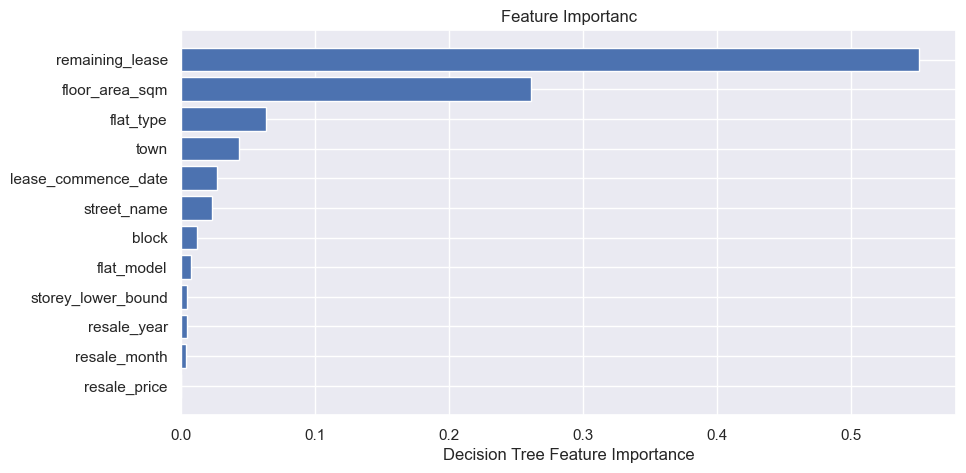

In [100]:
sorted_idx = dt_regressor.feature_importances_.argsort()

plt.figure(figsize = (10, 5))

plt.barh(df.columns[sorted_idx], dt_regressor.feature_importances_[sorted_idx])

plt.xlabel("Decision Tree Feature Importance")

plt.title("Feature Importanc")

plt.show()

In [101]:
model = dt_regressor.fit(x_train, y_train)

In [102]:
model

DecisionTreeRegressor(max_depth=20, random_state=11)

In [103]:
import pickle

# SAVE THE MODEL TO DISK

filename = "DecisionTreeRegressor_model.pkl"

with open(filename, "wb") as file:
    
    pickle.dump(model, file)
    
print(f"Saved {filename} model to disk")    

Saved DecisionTreeRegressor_model.pkl model to disk


### PREDICTING

In [104]:
# GET SAMPLE TO PREDICT THE RESALE PRICE

pre_df = df1.sample(n = 5)

pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
240862,25,5,427.0,334,122.0,14,1989.0,285000.0,68.0,1999,3,1,3
109711,9,4,334.0,86,92.0,15,1978.0,270000.0,68.0,1995,12,7,9
204852,2,3,109.0,14,67.0,15,1977.0,146000.0,68.0,1998,8,10,12
656176,27,5,2.0,504,110.0,14,2004.0,532000.0,68.0,2012,2,10,12
476589,19,4,2.0,345,101.0,16,1997.0,279000.0,68.0,2005,9,13,15


In [105]:
# DROP THE RESALE PRICE COLUMN

A = pre_df.drop("resale_price", axis = 1)

### RESALE PRICE

In [106]:
# MAKE PREDICTIONS ON THE SAMPLE

pre_pred = dt_regressor.predict(A)

pre_pred

array([326183.0293725 , 263474.35897436, 153903.06696429, 574968.75      ,
       274534.61538462])